In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp

In [39]:
df = pd.read_csv("data/main")

## Explanation of Each Predictor
* **battery_power** - Total energy a battery can store in one time measured in mAh
* **blue**          - Whether the phone has bluetooth or not
* **clock_speed**   - Speed at which microprocessor executes instructions
* **dual_sim**      - Has dual sim support or not
* **fc**            - Front camera mega pixels
* **four_g**        - Whether the phone has 4G or not
* **int_memory**    - internal memory in gigabytes
* **m_dep**         - Mobile Depth in cm
* **mobile_wt**     - Weight of mobile phone
* **n_cores**       - Number of cores of a processor
* **pc**            - Primary Camera in mega pixels
* **px_height**     - Pixel Resolution Height
* **px_width**      - Pixel Resoulution Width
* **ram**           - Random Access Memory in Megabytes
* **sc_h**          - Screen Height of mobile in cm
* **sc_w**          - Screen Width of mobile in cm
* **talk_time**     - Longest time that a single battery charge will last when you are talking
* **three_g**       - Whether the phone has 3G or not
* **touch_screen**  - Whether the phone is touch screen or not
* **wifi**          - Whether the phone has wifi or not
* **price_range**   - Response variable; whether the phone is expensive or not

In [40]:
df.head()

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,No,2.2,No,1,No,7,0.6,188,...,20,756,2549,9,7,19,No,No,Yes,Below Average
1,1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,...,905,1988,2631,17,3,7,Yes,Yes,No,Above Average
2,2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,...,1263,1716,2603,11,2,9,Yes,Yes,No,Above Average
3,3,615,Yes,2.5,No,0,No,10,0.8,131,...,1216,1786,2769,16,8,11,Yes,No,No,Above Average
4,4,1821,Yes,1.2,No,13,Yes,44,0.6,141,...,1208,1212,1411,8,2,15,Yes,Yes,No,Below Average


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2000 non-null   int64  
 1   battery_power  2000 non-null   int64  
 2   blue           2000 non-null   object 
 3   clock_speed    2000 non-null   float64
 4   dual_sim       2000 non-null   object 
 5   fc             2000 non-null   int64  
 6   four_g         2000 non-null   object 
 7   int_memory     2000 non-null   int64  
 8   m_dep          2000 non-null   float64
 9   mobile_wt      2000 non-null   int64  
 10  n_cores        2000 non-null   int64  
 11  pc             2000 non-null   int64  
 12  px_height      2000 non-null   int64  
 13  px_width       2000 non-null   int64  
 14  ram            2000 non-null   int64  
 15  sc_h           2000 non-null   int64  
 16  sc_w           2000 non-null   int64  
 17  talk_time      2000 non-null   int64  
 18  three_g 

In [42]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000,2000.000000,2000,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000
unique,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,4
top,NaN,No,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Below Average
freq,NaN,1010,NaN,1019,NaN,1043,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1523,1006,1014,500
mean,1238.518500,NaN,1.522250,NaN,4.309500,NaN,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,NaN,NaN,NaN,NaN
std,439.418206,NaN,0.816004,NaN,4.341444,NaN,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,NaN,NaN,NaN,NaN
min,501.000000,NaN,0.500000,NaN,0.000000,NaN,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
25%,851.750000,NaN,0.700000,NaN,1.000000,NaN,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,NaN,NaN,NaN,NaN
50%,1226.000000,NaN,1.500000,NaN,3.000000,NaN,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,NaN,NaN,NaN,NaN
75%,1615.250000,NaN,2.200000,NaN,7.000000,NaN,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,NaN,NaN,NaN,NaN


## Distribution of the Data (Univariate)

### First look at the distribution of categorical data.
- All categorical variables are evenly distributed except for 3G
- It seems the phones that allow 4G are included in the 3G predictor. May cause some dependency issues
- Our response variable is evenly distributed among all four categories

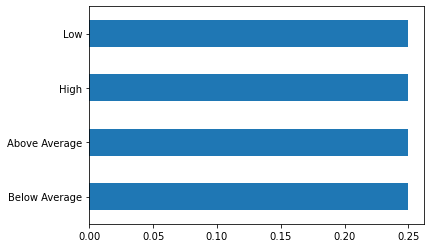

In [50]:
df.price_range.value_counts(normalize=True)
df.price_range.value_counts(normalize=True).plot.barh()
plt.show()

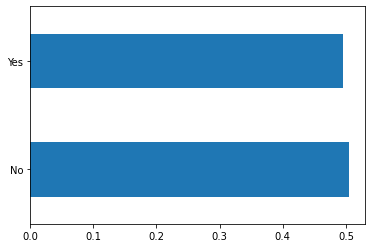

In [43]:
df.blue.value_counts(normalize=True)
df.blue.value_counts(normalize=True).plot.barh()
plt.show()

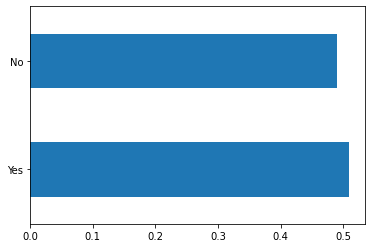

In [44]:
df.dual_sim.value_counts(normalize=True)
df.dual_sim.value_counts(normalize=True).plot.barh()
plt.show()

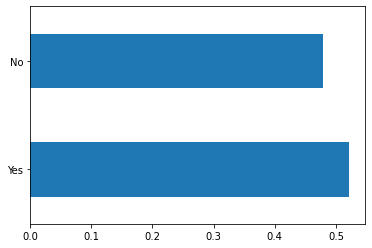

In [45]:
df.four_g.value_counts(normalize=True)
df.four_g.value_counts(normalize=True).plot.barh()
plt.show()

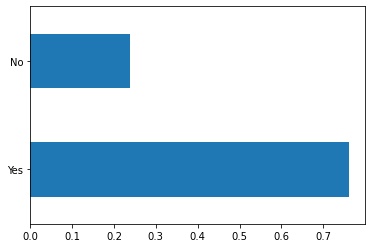

In [46]:
df.three_g.value_counts(normalize=True)
df.three_g.value_counts(normalize=True).plot.barh()
plt.show()

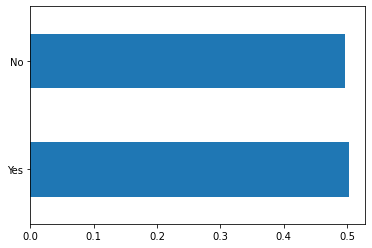

In [48]:
df.touch_screen.value_counts(normalize=True)
df.touch_screen.value_counts(normalize=True).plot.barh()
plt.show()

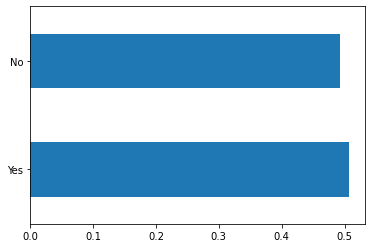

In [49]:
df.wifi.value_counts(normalize=True)
df.wifi.value_counts(normalize=True).plot.barh()
plt.show()

### Look at the distribution of continuous data

- px_height has an outlier
    - It is 1960, again this may not be an error as many expensive phones have this resolution.
- fc has multiple outliers
    - not an error due to phones having mega pixels over 20
- rest of data follows fairly normal distribution. 


In [51]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


<AxesSubplot:>

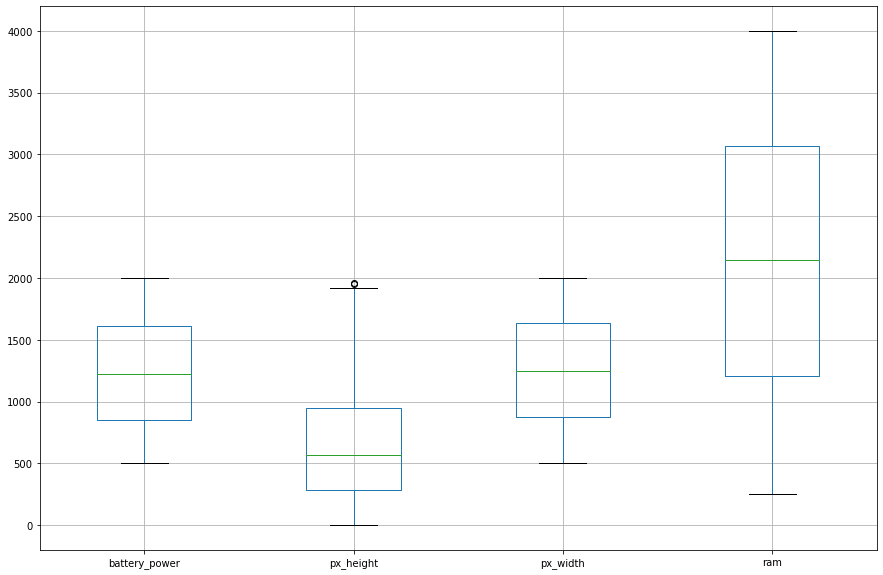

In [59]:
df[['battery_power', 'px_height', 'px_width', 'ram']].boxplot(figsize=(15,10))

<AxesSubplot:>

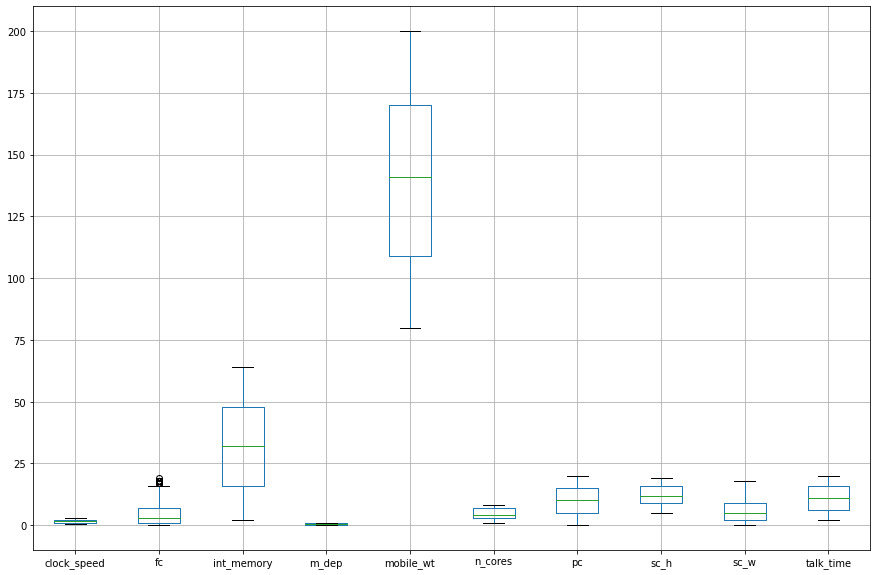

In [61]:
df.drop(['battery_power', 'px_height', 'px_width', 'ram'], axis=1).boxplot(figsize=(15,10))

<AxesSubplot:>

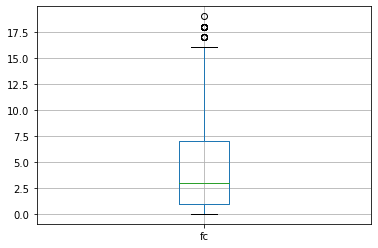

In [64]:
df.boxplot(column='fc')

## Distribution of Data (Bivariate)